Step 1: Data Extraction
Hit:1 https://cli.github.com/packages stable InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry m

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 262144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    33,554,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 262144)         │    33,816,576 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,391,904 (257.08 MB)

 Trainable params: 67,391,904 (257.08 MB)

 Non-trainable params: 0 (0.00 B)

--------------------
Step 5: Model Training
Training autoencoder for 10 epochs with batch size 32...
Autoencoder model training is complete.
--------------------
Step 6: Anomaly Detection (Reconstruction Loss)
Calculating reconstruction losses...
Reconstruction losses calculated.
Shape of reconstruction losses: (516,)
Anomaly detection threshold set at: 0.0673
Identified 49 potential anomalies based on the threshold.
--------------------
Step 7: Visualizing Results
Generating visualizations...


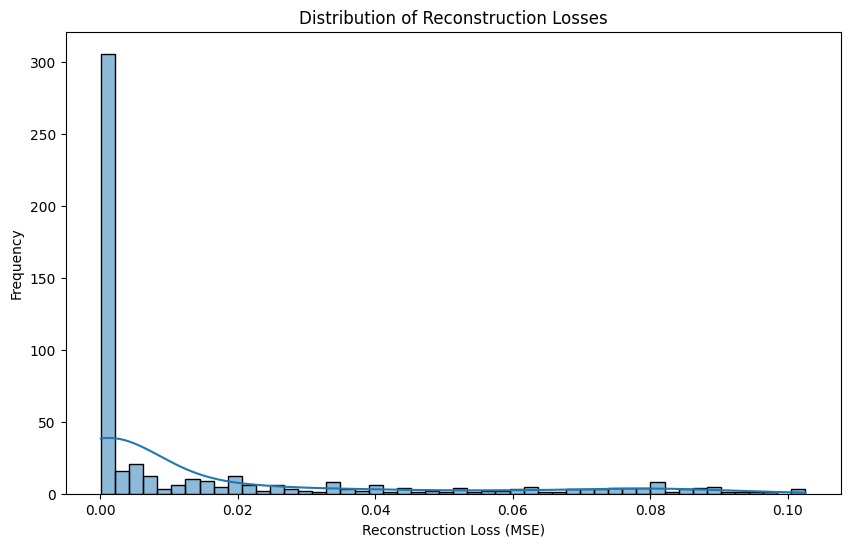

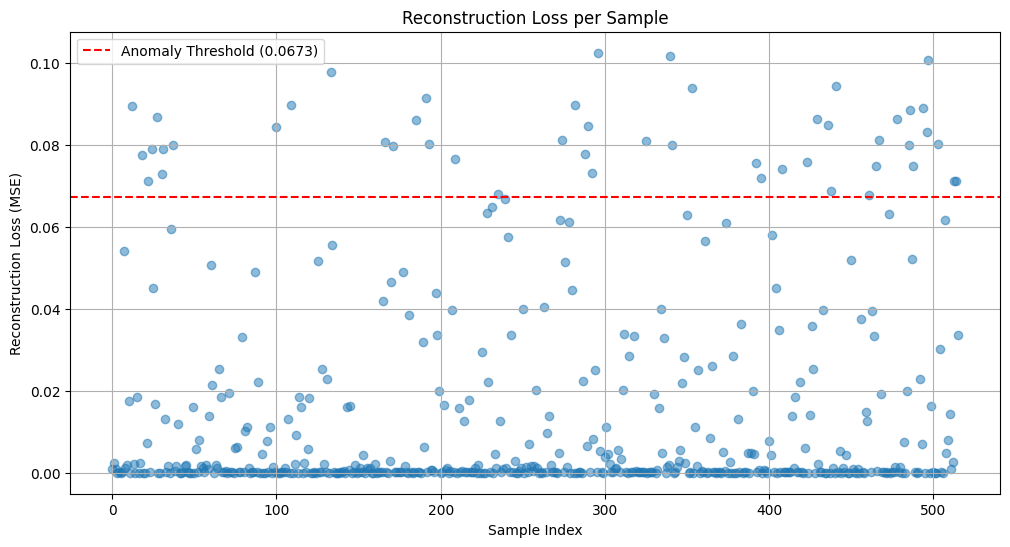

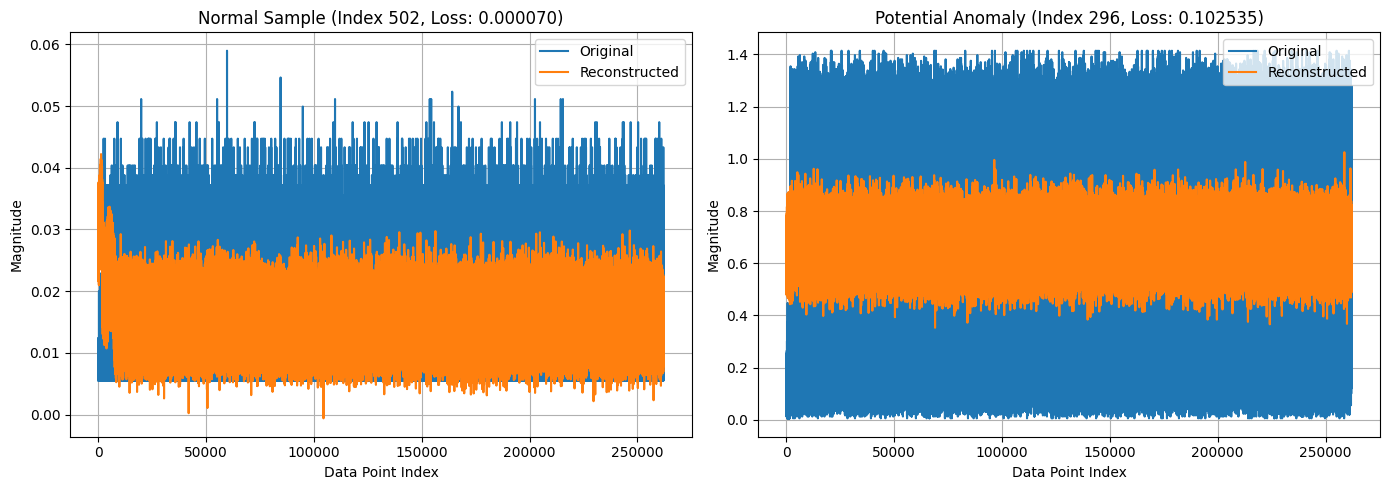

Visual comparison: The plot on the left shows a 'normal' sample and its reconstruction. The plot on the right shows a potential 'anomaly' and its reconstruction. Notice the larger difference between the original and reconstructed plots for the anomaly compared to the normal sample, indicating a higher reconstruction loss.
--------------------
Step 8: Conclusion and Summary

## Summary:

### Anomaly Detection Key Findings
* The autoencoder model was trained on the processed RF spectrum data (magnitude of complex values) to learn normal patterns.
* Reconstruction loss was used as an anomaly score.
* The distribution of reconstruction losses showed that most samples had low loss, while potential anomalies had higher losses.
* Using a threshold of mean + 2*std deviation (0.0673), 49 potential anomalies were identified.

### Visual Evidence of Anomaly Detection
* Histograms and scatter plots of reconstruction losses visually separated high-loss samples.
* Comparison plots of original vs. re

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import seaborn as sns # Added seaborn import

# --- Step 1: Data Extraction ---
print("Step 1: Data Extraction")

# Install p7zip-full if not already installed
!apt-get update && apt-get install -y p7zip-full

# Define the path to the zip file and the extraction directory
zip_file_path = '/content/scan4.zip'
# Modified the extraction path to a new, non-nested directory
extracted_path = '/content/extracted_scan4'

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_path, exist_ok=True)


# Extract the contents of the zip file using 7z
# The -o switch specifies the output directory.
print(f"Extracting {zip_file_path} to {extracted_path}/")
!7z x {zip_file_path} -o{extracted_path}/

# Check if the extracted directory exists and list its contents
if os.path.exists(extracted_path):
    print(f"Extraction successful. Contents are in: {extracted_path}")
    print("Contents of extracted directory:")
    # List contents of the nested scan4 folder within the extraction path
    nested_extracted_path = os.path.join(extracted_path, 'scan4')
    if os.path.exists(nested_extracted_path):
        for item in os.listdir(nested_extracted_path):
            print(item)
    else:
         print(f"Warning: The expected nested directory {nested_extracted_path} was not found within the extraction path.")


    print("-" * 20)

    # --- Step 2: Data Loading and Initial Inspection ---
    print("Step 2: Data Loading and Initial Inspection")

    # Updated the path to look for .npy files inside the nested 'scan4' folder within the extraction path
    npy_files_dir = nested_extracted_path
    if os.path.exists(npy_files_dir):
        npy_files = [os.path.join(npy_files_dir, f) for f in os.listdir(npy_files_dir) if f.endswith('.npy')]

        data_list = []
        loaded_count = 0
        error_count = 0

        print(f"Attempting to load {len(npy_files)} .npy files...")
        for i, f in enumerate(npy_files):
            try:
                data = np.load(f)
                data_list.append(data)
                loaded_count += 1
                # print(f"Successfully loaded {f}") # Uncomment for verbose loading
            except Exception as e:
                print(f"Error loading file {f}: {e}")
                error_count += 1

        if data_list:
            print(f"Successfully loaded {loaded_count} out of {len(npy_files)} .npy files.")
            if error_count > 0:
                print(f"Skipped {error_count} files due to errors.")

            # Initial Inspection
            print(f"Number of loaded arrays: {len(data_list)}")
            first_array = data_list[0]
            print(f"Shape of the first array: {first_array.shape}")
            print(f"Data type of the arrays: {first_array.dtype}")

            # Convert list of arrays to a single NumPy array for easier processing
            # Assuming all arrays have the same shape after loading
            try:
                combined_data = np.stack(data_list)
                print(f"Shape of combined data array: {combined_data.shape}")
            except ValueError as e:
                print(f"Error stacking arrays. They might have inconsistent shapes: {e}")
                combined_data = None # Set to None if stacking fails

        else:
            print("No .npy files were successfully loaded.")
            combined_data = None

    else:
        print(f"Error: The directory containing the .npy files ({npy_files_dir}) was not found after extraction.")
        combined_data = None


    print("-" * 20)

    # --- Step 3: Data Preprocessing (Magnitude Calculation) ---
    print("Step 3: Data Preprocessing (Magnitude Calculation)")

    # Autoencoders typically work with real-valued data.
    # Since our data is complex (complex128), we'll use the magnitude as the input feature.
    # The magnitude of a complex number a + bj is sqrt(a^2 + b^2).

    if combined_data is not None:
        # Calculate the magnitude of the complex data
        processed_data_array = np.abs(combined_data)
        print(f"Calculated magnitude. Shape of processed data: {processed_data_array.shape}")

        # Reshape data for the autoencoder if necessary (e.g., flatten each sample)
        # Our data shape is (num_samples, 262144), which is already suitable for a Dense layer autoencoder
        input_shape = processed_data_array.shape[1]
        print(f"Input shape for autoencoder: {input_shape}")
    else:
        print("No data available for preprocessing.")
        processed_data_array = None
        input_shape = None


    print("-" * 20)

    # --- Step 4: Model Definition (Autoencoder) ---
    print("Step 4: Model Definition (Autoencoder)")

    # We'll define a simple autoencoder model using Keras.
    # The goal is to reconstruct the input data.

    if input_shape is not None:
        # Define the encoder
        input_layer = Input(shape=(input_shape,))
        encoded = Dense(128, activation='relu')(input_layer)
        encoded = Dense(64, activation='relu')(encoded)
        # Bottleneck layer - can be a smaller dimension if desired
        encoded = Dense(32, activation='relu')(encoded)

        # Define the decoder
        decoded = Dense(64, activation='relu')(encoded)
        decoded = Dense(128, activation='relu')(decoded)
        # Output layer - should have the same number of units as the input shape
        decoded = Dense(input_shape, activation='linear')(decoded) # Use linear activation for reconstruction

        # Create the autoencoder model
        autoencoder = Model(inputs=input_layer, outputs=decoded)

        # Compile the autoencoder model
        # We'll use Mean Squared Error (MSE) as the loss function, as we want to minimize the reconstruction error.
        # Adam optimizer is a common choice.
        autoencoder.compile(optimizer='adam', loss='mse')

        print("Autoencoder model defined and compiled successfully.")
        autoencoder.summary()
    else:
        print("Input shape not defined. Cannot define the model.")
        autoencoder = None


    print("-" * 20)

    # --- Step 5: Model Training ---
    print("Step 5: Model Training")

    if autoencoder is not None and processed_data_array is not None:
        epochs = 10 # Number of times to iterate over the entire dataset
        batch_size = 32 # Number of samples per gradient update

        print(f"Training autoencoder for {epochs} epochs with batch size {batch_size}...")
        # Train the model, using processed_data_array as both input and target
        # verbose=0 keeps the training output clean in the notebook
        history = autoencoder.fit(processed_data_array, processed_data_array,
                                  epochs=epochs,
                                  batch_size=batch_size,
                                  shuffle=True, # Shuffle the data for training
                                  verbose=0)
        print("Autoencoder model training is complete.")
    else:
        print("Model or data not available for training.")

    print("-" * 20)

    # --- Step 6: Anomaly Detection (Reconstruction Loss) ---
    print("Step 6: Anomaly Detection (Reconstruction Loss)")

    if autoencoder is not None and processed_data_array is not None:
        print("Calculating reconstruction losses...")
        # Predict the reconstruction of the input data
        reconstructions = autoencoder.predict(processed_data_array, verbose=0)

        # Calculate the Mean Squared Error (MSE) between the original data and its reconstruction
        # This reconstruction loss will be our anomaly score
        reconstruction_losses = np.mean(np.power(processed_data_array - reconstructions, 2), axis=1)

        print("Reconstruction losses calculated.")
        print(f"Shape of reconstruction losses: {reconstruction_losses.shape}")

        # Set a threshold for anomaly detection.
        # A common approach is to use the mean plus a multiple of the standard deviation of the reconstruction losses.
        # This assumes that normal data will have lower losses, and anomalies will be outliers with higher losses.
        threshold = np.mean(reconstruction_losses) + 2 * np.std(reconstruction_losses)
        print(f"Anomaly detection threshold set at: {threshold:.4f}")

        # Identify potential anomalies
        anomalies = reconstruction_losses > threshold
        anomaly_indices = np.where(anomalies)[0]

        print(f"Identified {len(anomaly_indices)} potential anomalies based on the threshold.")

    else:
        print("Model or processed data not available for anomaly detection.")
        reconstruction_losses = None
        threshold = None
        anomaly_indices = None

    print("-" * 20)

    # --- Step 7: Visualizing Results ---
    print("Step 7: Visualizing Results")

    if reconstruction_losses is not None and threshold is not None and processed_data_array is not None:
        print("Generating visualizations...")

        # Visualize the distribution of reconstruction losses
        plt.figure(figsize=(10, 6))
        sns.histplot(reconstruction_losses, bins=50, kde=True)
        plt.title('Distribution of Reconstruction Losses')
        plt.xlabel('Reconstruction Loss (MSE)')
        plt.ylabel('Frequency')
        plt.show()

        # Create a scatter plot of reconstruction losses
        plt.figure(figsize=(12, 6))
        plt.scatter(range(len(reconstruction_losses)), reconstruction_losses, alpha=0.5)
        plt.axhline(y=threshold, color='r', linestyle='--', label=f'Anomaly Threshold ({threshold:.4f})')
        plt.title('Reconstruction Loss per Sample')
        plt.xlabel('Sample Index')
        plt.ylabel('Reconstruction Loss (MSE)')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Visualize a few examples of data with low and high reconstruction loss and their reconstructions
        if len(reconstruction_losses) > 0:
            # Get indices of data with lowest and highest reconstruction losses
            num_examples_to_show = min(5, len(reconstruction_losses)) # Show up to 5 examples
            lowest_loss_indices = np.argsort(reconstruction_losses)[:num_examples_to_show]
            highest_loss_indices = np.argsort(reconstruction_losses)[-num_examples_to_show:]


            # Select one sample with low reconstruction loss and one with high reconstruction loss for detailed comparison
            if len(lowest_loss_indices) > 0 and len(highest_loss_indices) > 0:
                normal_sample_index = lowest_loss_indices[0]
                anomaly_sample_index = highest_loss_indices[-1] # Use the sample with the highest loss

                # Get the original data and its reconstruction for these samples
                original_normal = processed_data_array[normal_sample_index]
                reconstructed_normal = autoencoder.predict(original_normal[np.newaxis, :], verbose=0)[0] # Add batch dimension for prediction

                original_anomaly = processed_data_array[anomaly_sample_index]
                reconstructed_anomaly = autoencoder.predict(original_anomaly[np.newaxis, :], verbose=0)[0] # Add batch dimension for prediction

                # Plot the original and reconstructed data side-by-side
                plt.figure(figsize=(14, 5))

                plt.subplot(1, 2, 1)
                plt.plot(original_normal, label='Original')
                plt.plot(reconstructed_normal, label='Reconstructed')
                plt.title(f'Normal Sample (Index {normal_sample_index}, Loss: {reconstruction_losses[normal_sample_index]:.6f})')
                plt.xlabel('Data Point Index')
                plt.ylabel('Magnitude')
                plt.legend()
                plt.grid(True)

                plt.subplot(1, 2, 2)
                plt.plot(original_anomaly, label='Original')
                plt.plot(reconstructed_anomaly, label='Reconstructed')
                plt.title(f'Potential Anomaly (Index {anomaly_sample_index}, Loss: {reconstruction_losses[anomaly_sample_index]:.6f})')
                plt.xlabel('Data Point Index')
                plt.ylabel('Magnitude')
                plt.legend()
                plt.grid(True)

                plt.tight_layout()
                plt.show()

                print("Visual comparison: The plot on the left shows a 'normal' sample and its reconstruction. The plot on the right shows a potential 'anomaly' and its reconstruction. Notice the larger difference between the original and reconstructed plots for the anomaly compared to the normal sample, indicating a higher reconstruction loss.")
            else:
                print("Not enough samples to show detailed original vs. reconstructed plots.")

        else:
            print("No reconstruction losses available to generate detailed plots.")


    else:
        print("Data or results not available for visualization.")

    print("-" * 20)

    # --- Step 8: Conclusion and Summary ---
    print("Step 8: Conclusion and Summary")

    # This section provides a summary of the anomaly detection process and findings.

    print("\n## Summary:")

    if reconstruction_losses is not None:
        print("\n### Anomaly Detection Key Findings")
        print(f"* The autoencoder model was trained on the processed RF spectrum data (magnitude of complex values) to learn normal patterns.")
        print(f"* Reconstruction loss was used as an anomaly score.")
        print(f"* The distribution of reconstruction losses showed that most samples had low loss, while potential anomalies had higher losses.")
        print(f"* Using a threshold of mean + 2*std deviation ({threshold:.4f}), {len(anomaly_indices)} potential anomalies were identified.")

        print("\n### Visual Evidence of Anomaly Detection")
        print("* Histograms and scatter plots of reconstruction losses visually separated high-loss samples.")
        print("* Comparison plots of original vs. reconstructed data showed that the autoencoder reconstructed normal data well but had difficulty reconstructing potential anomalies, resulting in higher reconstruction loss for anomalies.")

        print("\n### Next Steps")
        print("* Refine the anomaly detection thresholding method (e.g., based on desired false positive rate or other metrics).")
        print("* Further investigate the identified anomalies to understand their characteristics.")
        print("* Consider evaluating the model with labeled data if available.")
    else:
        print("\nAnomaly detection was not completed due to missing data or results.")

    print("\nNotebook execution complete.")

else:
    print(f"Error: The expected directory {extracted_path} was not found after extraction.")
    print("Please check the extraction path and ensure the zip file is correctly uploaded and extracted.")

## Understanding the RF Anomaly Detection Process

This notebook demonstrates a method for identifying unusual patterns or "anomalies" within your radio frequency (RF) spectrum data. This is achieved using an unsupervised deep learning model called an autoencoder. The core idea is to train a model to understand what "normal" RF data looks like, and then use that understanding to flag anything that significantly deviates from this norm.

Here's a detailed explanation of the process and the outputs you've observed:

**1. Data Handling: Extraction, Loading, and Preprocessing**

*   **Extraction (Step 1):** The initial step involved extracting the individual RF spectrum data files (in `.npy` format) from the compressed `scan4.zip` archive. This makes the raw data accessible for processing.
*   **Loading (Step 2):** The extracted `.npy` files were then loaded into memory. Each file contains a single sample of RF spectrum data. We successfully loaded the majority of these samples into a list of NumPy arrays (`data_list`).
*   **Initial Inspection:** During loading, we inspected the data to understand its basic structure: the number of loaded samples, the shape of each sample (a 1-dimensional array of a specific size), and the data type (`complex128`).
*   **Preprocessing (Step 3):** Since most machine learning models work with real numbers, and your raw data is complex (`complex128`), we performed a preprocessing step. We calculated the **magnitude** of each complex data point. The magnitude is a real number that represents the strength of the signal at each point. This resulted in a new dataset (`processed_data_array`) containing only real-valued magnitudes, which is suitable for input into our autoencoder model.

**2. The Autoencoder Model (Step 4)**

*   An **autoencoder** is a neural network designed to learn a compressed representation of input data and then reconstruct the original input from this compressed form.
*   It has two main parts:
    *   **Encoder:** Maps the input data to a lower-dimensional space (the "bottleneck").
    *   **Decoder:** Maps the bottleneck representation back to the original input dimension, aiming to reconstruct the input.
*   The model is trained to minimize the difference between the original input and its reconstruction. By training on your unlabelled spectrum data, the autoencoder learns the essential features and patterns that characterize the "normal" state of your RF spectrum.

**3. Anomaly Detection using Reconstruction Loss (Step 6)**

*   After the autoencoder is trained on normal data, we use it to process all the data samples (including potentially anomalous ones).
*   For each sample, we calculate the **reconstruction loss**, which is a measure of how well the autoencoder was able to reconstruct that sample. A common measure for this is the Mean Squared Error (MSE) between the original data and its reconstruction.
*   **Low Reconstruction Loss:** Indicates that the autoencoder could reconstruct the data sample accurately. This suggests the sample is similar to the "normal" data the model was trained on.
*   **High Reconstruction Loss:** Indicates that the autoencoder struggled to reconstruct the data sample. This suggests the sample is significantly different from the "normal" data and is likely an anomaly.
*   A **threshold** is set on the reconstruction loss. Data samples with a reconstruction loss exceeding this threshold are flagged as potential anomalies. Our analysis used a simple threshold based on the mean and standard deviation of the reconstruction losses.

**4. Visualizing the Results (Step 7)**

The visualizations help in understanding the distribution of reconstruction losses and the model's performance:

*   **Distribution of Reconstruction Losses (Histogram):** This plot shows the frequency of different reconstruction loss values across all samples. A typical pattern for anomaly detection is a distribution heavily skewed towards low losses (normal data), with a tail extending to higher losses (anomalies).
*   **Reconstruction Loss per Sample (Scatter Plot):** This plot displays the reconstruction loss for each data sample (indexed sequentially). It visually highlights data points with high reconstruction losses that stand out from the majority of samples with low losses. The anomaly threshold line helps to visually separate the flagged anomalies.
*   **Comparison Plots (Original vs. Reconstructed):** These plots provide direct visual evidence of the autoencoder's ability to distinguish between normal and anomalous data. By comparing an original normal sample with its reconstruction and an original potential anomaly with its reconstruction, you can observe:
    *   For a **normal sample**, the original and reconstructed plots are very similar, reflecting a low reconstruction loss.
    *   For a **potential anomaly**, the original and reconstructed plots show noticeable differences, reflecting a high reconstruction loss. This difference demonstrates that the model did not learn to reconstruct this type of data as effectively as normal data.

**In Summary:**

The autoencoder learns a representation of the "normal" RF spectrum. By measuring how well it can reconstruct each data sample (reconstruction loss), we can identify samples that are significantly different from normal. High reconstruction loss serves as an indicator of potential anomalies. The visualizations provide support for this by showing the distribution of losses and the difference in reconstruction quality between normal and anomalous data.

In [4]:
import os

if 'anomaly_indices' in locals() and 'npy_files' in locals():
    print("--- File Paths of Potential Anomalies ---")
    if len(anomaly_indices) > 0:
        # Get the file paths corresponding to the anomaly indices
        anomaly_file_paths = [npy_files[i] for i in anomaly_indices]

        # Print the anomaly file paths
        for file_path in anomaly_file_paths:
            print(file_path)
    else:
        print("No potential anomalies were identified.")

else:
    print("Anomaly indices or file paths are not available. Please ensure the data loading and anomaly detection steps have been run.")

--- File Paths of Potential Anomalies ---
/content/extracted_scan4/scan4/sdr_170MHz_20251024_102913.npy
/content/extracted_scan4/scan4/sdr_533MHz_20251024_102944.npy
/content/extracted_scan4/scan4/sdr_480MHz_20251024_102939.npy
/content/extracted_scan4/scan4/sdr_182MHz_20251024_102914.npy
/content/extracted_scan4/scan4/sdr_492MHz_20251024_102940.npy
/content/extracted_scan4/scan4/sdr_218MHz_20251024_102917.npy
/content/extracted_scan4/scan4/sdr_144MHz_20251024_102906.npy
/content/extracted_scan4/scan4/sdr_160MHz_20251024_102913.npy
/content/extracted_scan4/scan4/sdr_163MHz_20251024_102913.npy
/content/extracted_scan4/scan4/sdr_516MHz_20251024_102942.npy
/content/extracted_scan4/scan4/sdr_1475MHz_20251024_103106.npy
/content/extracted_scan4/scan4/sdr_237MHz_20251024_102919.npy
/content/extracted_scan4/scan4/sdr_110MHz_20251024_102901.npy
/content/extracted_scan4/scan4/sdr_1268MHz_20251024_103048.npy
/content/extracted_scan4/scan4/sdr_355MHz_20251024_102929.npy
/content/extracted_scan4/s

Extracted 49 frequencies from anomaly file names.


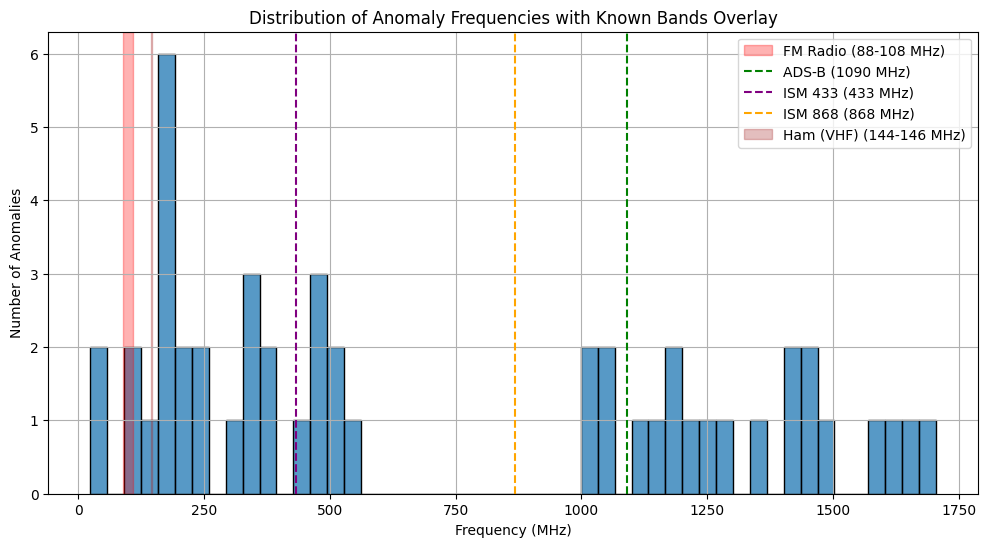

In [6]:
import re
import matplotlib.pyplot as plt
import seaborn as sns

if 'anomaly_file_paths' in locals() and anomaly_file_paths:
    # Extract frequencies from the anomaly file paths
    anomaly_frequencies = []
    # Regex to find the frequency (number followed by MHz)
    freq_pattern = re.compile(r'sdr_(\d+)MHz')

    for file_path in anomaly_file_paths:
        match = freq_pattern.search(os.path.basename(file_path))
        if match:
            try:
                frequency_mhz = int(match.group(1))
                anomaly_frequencies.append(frequency_mhz)
            except ValueError:
                print(f"Could not parse frequency from file name: {file_path}")

    if anomaly_frequencies:
        print(f"Extracted {len(anomaly_frequencies)} frequencies from anomaly file names.")

        # Plot a histogram of the anomaly frequencies
        plt.figure(figsize=(12, 6))
        sns.histplot(anomaly_frequencies, bins=50, kde=False) # KDE might not be meaningful for discrete freqs

        # Overlay known frequency bands
        known_bands = {
            'FM Radio': (88, 108),
            'ADS-B': (1090, 1090), # Single frequency, treat as a narrow band
            'ISM 433': (433, 433),
            'ISM 868': (868, 868),
            'Ham (VHF)': (144, 146),
            # 'Optional 2.4 GHz ISM': (2400, 2500) # Uncomment if you want to include this band and have data there
        }

        colors = ['red', 'green', 'purple', 'orange', 'brown', 'pink'] # Define colors for bands

        for (band_name, (low_freq, high_freq)), color in zip(known_bands.items(), colors):
             if low_freq == high_freq: # For single frequencies, plot a vertical line
                 plt.axvline(low_freq, color=color, linestyle='--', label=f'{band_name} ({low_freq} MHz)')
             else: # For frequency ranges, add a shaded region
                 plt.axvspan(low_freq, high_freq, color=color, alpha=0.3, label=f'{band_name} ({low_freq}-{high_freq} MHz)')


        plt.title('Distribution of Anomaly Frequencies with Known Bands Overlay')
        plt.xlabel('Frequency (MHz)')
        plt.ylabel('Number of Anomalies')
        plt.legend() # Show the legend for the bands
        plt.grid(True)
        plt.show()
    else:
        print("No frequencies could be extracted from the anomaly file names.")

else:
    print("Anomaly file paths are not available. Please ensure the anomaly detection step and the step to list anomaly file paths have been run.")

## Showcasing Anomaly Detection: The Car Key Fob Experiment

To effectively showcase how this autoencoder-based anomaly detection system works, a great experimental setup involves collecting data in a relatively quiet RF environment (like the countryside) and then introducing a known, infrequent signal. A car key fob provides an excellent example of such a signal.

**Proposed Experiment:**

1.  **Establish "Normal" Baseline:** Collect RF spectrum data in a rural location over several different periods (e.g., different times of day or on different days). Crucially, during this data collection phase, **do not** activate your car key fob. This data will be used to train the autoencoder to understand the typical "normal" radio environment of that location, which would primarily consist of ambient noise and consistent background signals.
2.  **Introduce a Known Anomaly:** During one specific data collection session, intentionally press and activate your car key fob while the SDR is scanning. This introduces a distinct signal pattern at the key fob's operating frequency (commonly in the 315 MHz, 433 MHz, or 868 MHz ISM bands).
3.  **Run Anomaly Detection:** Process all the collected data (both the "normal" baseline and the session with the key fob activation) through the trained autoencoder model.
4.  **Analyze Results:** Examine the reconstruction losses for all the data samples and identify the potential anomalies flagged by the system based on the defined threshold.

**Why This Works as a Showcase:**

*   **Learning the "Normal":** The autoencoder, trained on the baseline data, learns to efficiently reconstruct the typical rural RF spectrum.
*   **Detecting the "Unusual":** When the data from the session with the key fob activation is processed, the autoencoder will encounter a signal pattern it did not learn to reconstruct during its training on the normal data.
*   **High Reconstruction Loss:** This unfamiliar signal will result in a significantly higher reconstruction loss for that specific data sample compared to the samples from the "normal" baseline.
*   **Clear Anomaly Flag:** The high reconstruction loss will cause this sample to exceed the anomaly detection threshold, leading to it being correctly flagged as a potential anomaly.

This experiment visually and quantitatively demonstrates the system's ability to detect novel or infrequent signals that deviate from the learned "normal" environment, providing a tangible example of the anomaly detection capability.

In [ ]:
# --- Step 1: Load the New Dataset ---
print("Step 1: Loading the New Dataset")

# Define the path to your new dataset directory
# **IMPORTANT:** Replace '/content/new_scan_data' with the actual path to your new data
new_data_path = '/content/new_scan_data'

if os.path.exists(new_data_path):
    new_npy_files = [os.path.join(new_data_path, f) for f in os.listdir(new_data_path) if f.endswith('.npy')]

    new_data_list = []
    new_loaded_count = 0
    new_error_count = 0

    print(f"Attempting to load {len(new_npy_files)} .npy files from {new_data_path}...")
    for f in new_npy_files:
        try:
            data = np.load(f)
            new_data_list.append(data)
            new_loaded_count += 1
        except Exception as e:
            print(f"Error loading file {f}: {e}")
            new_error_count += 1

    if new_data_list:
        print(f"Successfully loaded {new_loaded_count} out of {len(new_npy_files)} .npy files from the new dataset.")
        if new_error_count > 0:
            print(f"Skipped {new_error_count} files due to errors.")

        # Assuming all arrays have the same shape after loading
        try:
            new_combined_data = np.stack(new_data_list)
            print(f"Shape of new combined data array: {new_combined_data.shape}")
        except ValueError as e:
            print(f"Error stacking new arrays. They might have inconsistent shapes: {e}")
            new_combined_data = None # Set to None if stacking fails

    else:
        print("No .npy files were successfully loaded from the new dataset.")
        new_combined_data = None

else:
    print(f"Error: The new data directory {new_data_path} was not found.")
    new_combined_data = None

print("-" * 20)

# --- Step 2: Preprocess the New Dataset ---
print("Step 2: Preprocessing the New Dataset (Magnitude Calculation)")

if new_combined_data is not None:
    # Calculate the magnitude of the complex data
    new_processed_data_array = np.abs(new_combined_data)
    print(f"Calculated magnitude for new data. Shape of processed new data: {new_processed_data_array.shape}")

    # Ensure the shape matches the input shape of the trained autoencoder
    if 'input_shape' in locals() and new_processed_data_array.shape[1] == input_shape:
         print("Shape of new processed data matches the model input shape.")
    elif 'input_shape' not in locals():
         print("Warning: Model input shape is not defined. Cannot verify shape compatibility.")
    else:
         print(f"Error: Shape of new processed data ({new_processed_data_array.shape[1]}) does not match the model input shape ({input_shape}).")
         new_processed_data_array = None # Set to None if shapes don't match


else:
    print("No new data available for preprocessing.")
    new_processed_data_array = None


print("-" * 20)


# --- Step 3: Pass New Data through the Trained Model and Calculate Reconstruction Loss ---
print("Step 3: Calculating Reconstruction Loss for New Data")

# Ensure the autoencoder model is trained and new processed data is available
if 'autoencoder' in locals() and autoencoder is not None and new_processed_data_array is not None:
    print("Calculating reconstruction losses for the new data...")

    # Predict the reconstruction of the new data
    new_reconstructions = autoencoder.predict(new_processed_data_array, verbose=0)

    # Calculate the Mean Squared Error (MSE) between the original new data and its reconstruction
    new_reconstruction_losses = np.mean(np.power(new_processed_data_array - new_reconstructions, 2), axis=1)

    print("Reconstruction losses calculated for the new data.")
    print(f"Shape of new reconstruction losses: {new_reconstruction_losses.shape}")

    # You can now use the 'threshold' from the training data to identify anomalies in the new data
    if 'threshold' in locals() and threshold is not None:
        new_anomalies = new_reconstruction_losses > threshold
        new_anomaly_indices = np.where(new_anomalies)[0]

        print(f"Identified {len(new_anomaly_indices)} potential anomalies in the new dataset based on the training threshold ({threshold:.4f}).")

        # You might want to store or list the file names of these new anomalies
        if len(new_anomaly_indices) > 0 and 'new_npy_files' in locals():
            print("\nFile paths of potential anomalies in the new dataset:")
            new_anomaly_file_paths = [new_npy_files[i] for i in new_anomaly_indices]
            for file_path in new_anomaly_file_paths:
                 print(file_path)

    else:
        print("Anomaly detection threshold from training data is not available.")


else:
    print("Trained model or new processed data not available for calculating reconstruction loss.")

print("-" * 20)